Importing required libraries and modules

In [7]:
import numpy as np
import matplotlib.pyplot as plt


Defining weight and bias each neuron

In [8]:
# Perceptron weights
W1 = np.array([1, -1]) #The weight function of the first neuron
W2 = np.array([1, 1]) #The weight function of the second neuron
W3 = np.array([0, 1]) #The weight function of the third neuron


# Perceptron bias
bias1 = -25 #bias of the first neuron
bias2 = +25 #bias of the second neuron
bias3 = 0 #bias of the third neuron


ploting the triangle formed by these three neurons

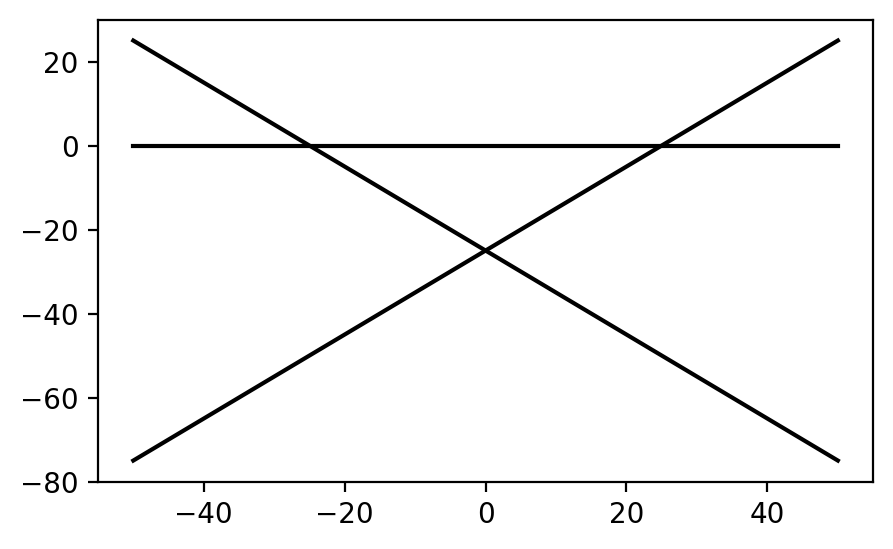

In [9]:
x = np.linspace(-50, 50, 1000) 
y1 = (W1[0]*x+bias1)/-W1[1]
y2 = (W2[0]*x+bias2)/-W2[1]
y3 = (W3[0]*x+bias3)/-W3[1]
plt.figure(figsize=(5,3),dpi=200)
plt.plot(x, y1, color='black')
plt.plot(x, y2, color='black')
plt.plot(x, y3, color='black')
plt.show()


Defining the required functions and network parameters

In [10]:
threshold_p = 0.2 # Positive threshold
threshold_n = -0.2 # Negative threshold
learning_rate = 1 # Learning rate

# Step function
def calculate_output(input):
    result = 0
    if input > threshold_p:
        result = 1
    if input < threshold_n:
        result = -1
    if threshold_n < input < threshold_p:
        result = 0
    return result

# Perceptron learning algorithm
def algorithm(input, weight, bias, target):
    for i in range(8):
        R = 0
        for j in range(3):
            R = input[i, j] * weight[j] + R
        R = R + bias
        R = calculate_output(R)
        if R != target[0, i]: # Does learning need to occur or not?
            for j in range(3):
                weight[j] = weight[j] + learning_rate * input[i, j] * target[0, i] # Update weights
                bias = bias + target[0, i] * learning_rate
    return weight, bias


Defining patterns and targets for the second layer wich is a logic operator

In [11]:

Target = np.array([[-1, -1, -1, -1, -1, 1, -1, -1]]) # Target matrix
patterns = np.array([[1, 1, 1], [1, 1, -1], [1, -1, 1], [1, -1, -1], [-1, 1, 1], [-1, 1, -1], [-1, -1, 1], [-1, -1, -1]]) # Possible patterns
P1 = np.array([[1, 1, 1]])
P2 = np.array([[1, 1, -1]])
P3 = np.array([[1, -1, 1]])
P4 = np.array([[1, -1, -1]])
P5 = np.array([[-1, 1, 1]])
P6 = np.array([[-1, 1, -1]])
P7 = np.array([[-1, -1, 1]])
P8 = np.array([[-1, -1, -1]])

W4 = np.zeros((3)) # Neuron 4 weight matrix
bias4 = 0 # Neuron 4 bias
n4 = 0 # Epoch count

# Training the neuron
while (n4 < 10):
    n4 = n4 + 1
    W4, bias4 = algorithm(patterns, W4, bias4, Target)

# Calculation of output function
def output(input, weight, bias):
    sum = 0
    for i in range(1):
        for j in range(3):
            sum = sum + weight[j] * input[i, j]
    sum = sum + bias
    return sum

# Testing the network function
def test(input, weight, bias):
    print("The Results are:")
    S = output(input, weight, bias)
    S = calculate_output(S)
    print(S)
    return S

# Testing the neuron
test(P1, W4, bias4)
test(P2, W4, bias4)
test(P3, W4, bias4)
test(P4, W4, bias4)
test(P5, W4, bias4)
test(P6, W4, bias4)
test(P7, W4, bias4)
test(P8, W4, bias4)




The Results are:
-1
The Results are:
-1
The Results are:
-1
The Results are:
-1
The Results are:
-1
The Results are:
1
The Results are:
-1
The Results are:
-1


-1

generating hundred random points, the points inside the triangle are marked in red, while the points outside the triangle are marked in blue.

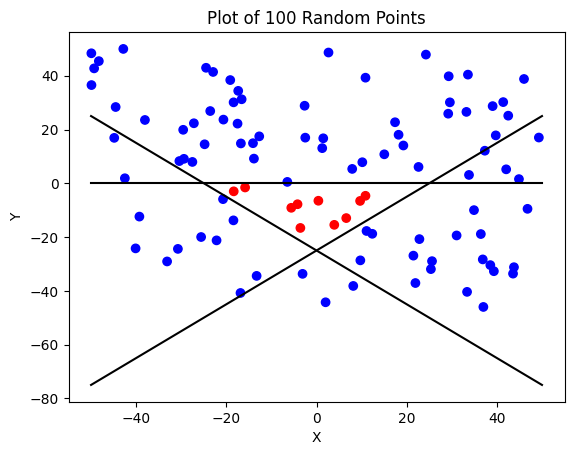

In [20]:
# Generate one hundred random points with coordinates between -50 and 50
points = np.random.uniform(low=-50, high=50, size=(100, 2))
matrix = np.zeros(100)  # Color matrix

# Feed each point to the network and calculate the output
for i in range(100):
    M1 = points[i, 0] * W1[0] + points[i, 1] * W1[1] + bias1
    M1 = calculate_output(M1)
    M2 = points[i, 0] * W2[0] + points[i, 1] * W2[1] + bias2
    M2 = calculate_output(M2)
    M3 = points[i, 0] * W3[0] + points[i, 1] * W3[1] + bias3
    M3 = calculate_output(M3)
    RP = [M1, M2, M3]
    M4 = RP[0] * W4[0] + RP[1] * W4[1] + RP[2] * W4[2] + bias4
    M4 = calculate_output(M4)
    matrix[i] = M4

xp = points[:, 0]
yp = points[:, 1]
colors = np.where(matrix == 1, 'red', 'blue')

# Plot points with distinct colors
plt.scatter(xp, yp, c=colors)
plt.plot(x, y1, color='black')
plt.plot(x, y2, color='black')
plt.plot(x, y3, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of 100 Random Points')
plt.show()